a. Import the necessary packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

b. Load the training and testing data (MNIST/CIFAR10)


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255
#These lines normalize the pixel values of the images in the training and testing datasets. Each pixel value is divided by 255 to scale it to a range between 0 and 1.
#Normalizing the pixel values often helps the training process and can improve the model's performance.


c. Define the network architecture using Keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


d. Train the model using SGD

In [ ]:
model.compile(optimizer="sgd",
loss = "sparse_categorical_crossentropy",
metrics=['accuracy'])

history= model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6511 - accuracy: 0.8346 - val_loss: 0.3616 - val_accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3434 - accuracy: 0.9040 - val_loss: 0.2990 - val_accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2959 - accuracy: 0.9161 - val_loss: 0.2697 - val_accuracy: 0.9245
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9248 - val_loss: 0.2485 - val_accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9321 - val_loss: 0.2295 - val_accuracy: 0.9336
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2237 - accuracy: 0.9369 - val_loss: 0.2138 - val_accuracy: 0.9374
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2077 - accuracy: 0.9420 - val_loss: 0.1979 - val_accuracy

e. Evaluate the network

313/313 [==============================] - 1s 2ms/step - loss: 0.1680 - accuracy: 0.9500
Loss = 0.168
Accuracy = 0.950


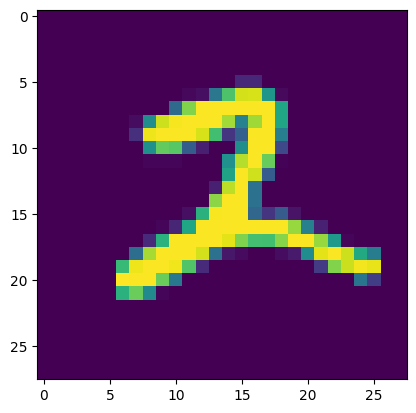

313/313 [==============================] - 1s 2ms/step


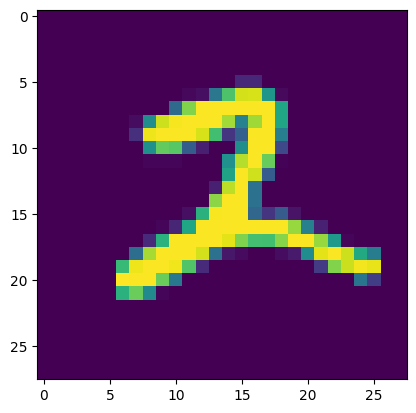

Predicted value: [1.7376648e-06 3.0831189e-04 9.8521930e-01 5.1497542e-03 2.5349934e-07
 1.7295389e-04 2.9270864e-06 4.2046681e-03 4.8417733e-03 9.8137440e-05]


In [ ]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print("Predicted value:", predicted_value[n])

f. Plot the training loss and accuracy

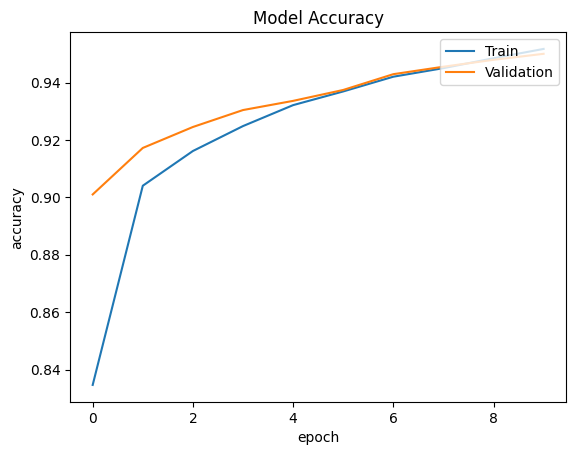

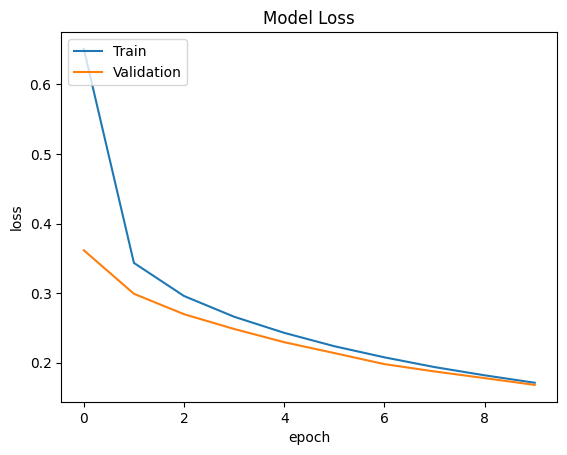

In [ ]:
#plotting the training accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc = "upper right")
plt.show()

#plotting the training loss

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc = "upper left")
plt.show()

